In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score

from preprocessing import load_suffixes, prepare_input
from recalibrator import Recalibrator
from utils import match
from confidence_intervals import confidence_intervals

In [3]:
trios = ["ajt", "chd", "corpas", "yri"]

# Pre-processing. Uncomment during first run of the script, then
# comment to avoid re-computing

# for trio in trios:
#     data_dir = '../data/' + trio + '/'
#     df = load_suffixes(data_dir)
#     df.to_csv(trio + '.csv', index=False)

For each trio, construct a training set from the remaining trios and save the predictions into a dictionary.

In [21]:

zs = np.linspace(1, 7, 20)

results = {}
for test in trios:
    print("|--- Test trio: {}".format(test))

    df_test = pd.read_csv(test + '.csv')
    y_test = df_test['justchild^GT'].values

    contaminations = df_test['contamination'].values
    contamination_values = list(sorted(np.unique(contaminations)))

    idx = {}

    for contamination in contamination_values:
        idx[contamination] = contaminations == contamination

    results[test] = {}
    
    results[test]['y_test'] = y_test
    results[test]['preds_naive'] = df_test['abortus^GT'].values
    results[test]['idx'] = idx
    results[test]['preds_ci'] = [confidence_intervals(df_test, z=z) for z in zs]



|--- Test trio: ajt


/home/boi/research/ML-maternal-cell-contamination/python/confidence_intervals.py:9: RuntimeWarning: divide by zero encountered in true_divide
  lower_bound = contaminations - z*np.sqrt(contaminations*(1 - contaminations)/df_test[ab_name + '^DP'].values)
/home/boi/research/ML-maternal-cell-contamination/python/confidence_intervals.py:10: RuntimeWarning: divide by zero encountered in true_divide
  upper_bound = contaminations + z*np.sqrt(contaminations*(1 - contaminations)/df_test[ab_name + '^DP'].values)


|--- Test trio: chd
|--- Test trio: corpas
|--- Test trio: yri


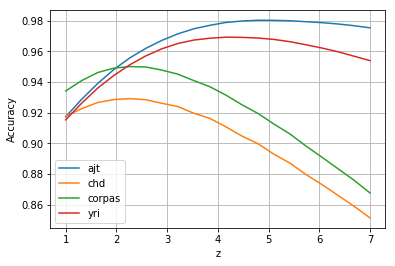

In [22]:
for trio in trios:
    plt.plot(zs, [accuracy_score(results[trio]['y_test'], preds) for preds in results[trio]['preds_ci']], label=trio)
#     print(accuracies)
    
plt.xlabel("z")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()